In [360]:
#Select year for analysis
year=2020

In [361]:

import pandas as pd

from datetime import datetime

import matplotlib.pyplot as plt
import re
import seaborn as sns
import itertools
import collections

import networkx as nx
from nltk.corpus import stopwords
import os

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df = pd.read_excel('ECB_speeches.xlsx')
df=df.dropna()


df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M')
df.head()

,date,speakers,title,subtitle,contents,year,month,month_year
0,2020-09-15,Fabio Panetta,Healing after the pandemic: supporting and sus...,"Speech by Fabio Panetta, Member of the Executi...",SPEECH Healing after the pandemic: supporting ...,2020,9,2020-09
1,2020-09-13,Christine Lagarde,Remarks at the Annual Meeting of the Council o...,"Contribution by Christine Lagarde, President o...",SPEECH Remarks at the Annual Meeting of the Co...,2020,9,2020-09
2,2020-09-11,Yves Mersch,Supervisory action in times of crisis and the ...,"Introductory statement by Yves Mersch, Member ...",SPEECH Supervisory action in times of crisis a...,2020,9,2020-09
3,2020-09-11,Isabel Schnabel,The shadow of fiscal dominance: Misconceptions...,"Speech by Isabel Schnabel, Member of the Execu...",SPEECH The shadow of fiscal dominance: Misconc...,2020,9,2020-09
4,2020-09-10,Christine Lagarde,Payments in a digital world,"Speech by Christine Lagarde, President of the ...",SPEECH Payments in a digital world Speech by ...,2020,9,2020-09


In [362]:
df['date'] =  pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

df= df[df['contents'].notna()]
print(df)

            date              speakers  \
0     2020-09-15         Fabio Panetta   
1     2020-09-13     Christine Lagarde   
2     2020-09-11           Yves Mersch   
3     2020-09-11       Isabel Schnabel   
4     2020-09-10     Christine Lagarde   
...          ...                   ...   
2407  1997-05-13  Alexandre Lamfalussy   
2408  1997-04-30  Alexandre Lamfalussy   
2409  1997-04-22  Alexandre Lamfalussy   
2410  1997-03-10  Alexandre Lamfalussy   
2411  1997-02-07  Alexandre Lamfalussy   

                                                  title  \
0     Healing after the pandemic: supporting and sus...   
1     Remarks at the Annual Meeting of the Council o...   
2     Supervisory action in times of crisis and the ...   
3     The shadow of fiscal dominance: Misconceptions...   
4                           Payments in a digital world   
...                                                 ...   
2407  The European Central Bank: independent and acc...   
2408  The operation of 

In [363]:
#Select a certain year

df=df.loc[df['year'] == year]
df

,date,speakers,title,subtitle,contents,year,month,month_year
0,2020-09-15,Fabio Panetta,Healing after the pandemic: supporting and sus...,"Speech by Fabio Panetta, Member of the Executi...",SPEECH Healing after the pandemic: supporting ...,2020,9,2020-09
1,2020-09-13,Christine Lagarde,Remarks at the Annual Meeting of the Council o...,"Contribution by Christine Lagarde, President o...",SPEECH Remarks at the Annual Meeting of the Co...,2020,9,2020-09
2,2020-09-11,Yves Mersch,Supervisory action in times of crisis and the ...,"Introductory statement by Yves Mersch, Member ...",SPEECH Supervisory action in times of crisis a...,2020,9,2020-09
3,2020-09-11,Isabel Schnabel,The shadow of fiscal dominance: Misconceptions...,"Speech by Isabel Schnabel, Member of the Execu...",SPEECH The shadow of fiscal dominance: Misconc...,2020,9,2020-09
4,2020-09-10,Christine Lagarde,Payments in a digital world,"Speech by Christine Lagarde, President of the ...",SPEECH Payments in a digital world Speech by ...,2020,9,2020-09
5,2020-08-27,Philip R. Lane,The pandemic emergency: the three challenges f...,"Speech by Philip R. Lane, Member of the Execut...",SPEECH The pandemic emergency: the three chall...,2020,8,2020-08
6,2020-08-26,Isabel Schnabel,Going negative: the ECB’s experience,"Speech by Isabel Schnabel, Member of the Execu...",SPEECH Going negative: the ECB’s experience Sp...,2020,8,2020-08
7,2020-07-22,Luis de Guindos,Building the Financial System of the 21st Century,"Speech by Luis de Guindos, Vice-President of t...",SPEECH Building the Financial System of the 2...,2020,7,2020-07
8,2020-07-17,Isabel Schnabel,"Never waste a crisis: COVID-19, climate change...","Speech by Isabel Schnabel, Member of the Execu...","SPEECH Never waste a crisis: COVID-19, climate...",2020,7,2020-07
9,2020-07-13,Fabio Panetta,Pursuing a successful path towards euro area a...,"Introductory remarks by Fabio Panetta, Member ...",SPEECH Pursuing a successful path towards eur...,2020,7,2020-07


In [364]:
#Text-Cleaning
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

from nltk import bigrams


df['clean_text'] = df['contents'].apply(lambda x: ' '.join([item for item in x.split()
                                                                  if item not in stop_words]))
df['clean_text'] = df['clean_text'].str.replace('\d+', '')

In [365]:
print(df['clean_text'])

0     SPEECH Healing pandemic: supporting sustaining...
1     SPEECH Remarks Annual Meeting Council Governor...
2     SPEECH Supervisory action times crisis limits ...
3     SPEECH The shadow fiscal dominance: Misconcept...
4     SPEECH Payments digital world Speech Christine...
5     SPEECH The pandemic emergency: three challenge...
6     SPEECH Going negative: ECB’s experience Speech...
7     SPEECH Building Financial System st Century Sp...
8     SPEECH Never waste crisis: COVID-, climate cha...
9     SPEECH Pursuing successful path towards euro a...
10    SPEECH Unleashing euro’s untapped potential gl...
12    SPEECH In spirit European cooperation Introduc...
13    SPEECH The price uncertainty uncertainty price...
14    SPEECH The ECB’s monetary policy coronavirus c...
15    SPEECH The World Economy Transformed Remarks Y...
17    SPEECH The ECB’s monetary policy response pand...
19    SPEECH Financial stability pandemic crisis Spe...
20    SPEECH The path uncertainty Remarks Christ

In [366]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

df_no_urls = [remove_url(text) for text in df['clean_text']]
df_no_urls[:1]



lower_case = [word.lower() for word in df['clean_text']]
sentences = df['clean_text']

df_no_urls[0].split()

words_in_df = [text.lower().split() for text in df_no_urls]
words_in_df[:2]


[['speech',
  'healing',
  'pandemic',
  'supporting',
  'sustaining',
  'recovery',
  'speech',
  'fabio',
  'panetta',
  'member',
  'executive',
  'board',
  'ecb',
  'th',
  'economist',
  'roundtable',
  'government',
  'greece',
  'september',
  'thank',
  'inviting',
  'today',
  'discuss',
  'response',
  'coronavirus',
  'covid',
  'crisis',
  'particular',
  'focus',
  'greece',
  'the',
  'pandemic',
  'caused',
  'significant',
  'disruption',
  'hardship',
  'nearly',
  'every',
  'aspect',
  'lives',
  'take',
  'time',
  'heal',
  'damage',
  'done',
  'the',
  'euro',
  'area',
  'economy',
  'severely',
  'hit',
  'today',
  'i',
  'argue',
  'europe',
  'responded',
  'major',
  'challenge',
  'woods',
  'yet',
  'in',
  'greece',
  'european',
  'domestic',
  'policies',
  'together',
  'played',
  'crucial',
  'role',
  'absorbing',
  'shock',
  'efforts',
  'needed',
  'at',
  'time',
  'hippocrates',
  'father',
  'medicine',
  'said',
  'healing',
  'matter',
  '

In [367]:
# List of all words
all_words_no_urls = list(itertools.chain(*words_in_df))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('the', 905),
 ('policy', 823),
 ('euro', 737),
 ('financial', 643),
 ('area', 637),
 ('monetary', 583),
 ('inflation', 543),
 ('ecb', 532),
 ('banks', 424),
 ('in', 386),
 ('also', 359),
 ('economic', 353),
 ('rates', 339),
 ('european', 334),
 ('see', 321)]

In [368]:
stop_words = stopwords.words('english')
stop_words.extend(["yet", "speech","also","see"])
# Remove stop words from each tweet list of words
df_nsw = [[word for word in df_words if not word in stop_words]
              for df_words in words_in_df]

df_nsw[0]


['healing',
 'pandemic',
 'supporting',
 'sustaining',
 'recovery',
 'fabio',
 'panetta',
 'member',
 'executive',
 'board',
 'ecb',
 'th',
 'economist',
 'roundtable',
 'government',
 'greece',
 'september',
 'thank',
 'inviting',
 'today',
 'discuss',
 'response',
 'coronavirus',
 'covid',
 'crisis',
 'particular',
 'focus',
 'greece',
 'pandemic',
 'caused',
 'significant',
 'disruption',
 'hardship',
 'nearly',
 'every',
 'aspect',
 'lives',
 'take',
 'time',
 'heal',
 'damage',
 'done',
 'euro',
 'area',
 'economy',
 'severely',
 'hit',
 'today',
 'argue',
 'europe',
 'responded',
 'major',
 'challenge',
 'woods',
 'greece',
 'european',
 'domestic',
 'policies',
 'together',
 'played',
 'crucial',
 'role',
 'absorbing',
 'shock',
 'efforts',
 'needed',
 'time',
 'hippocrates',
 'father',
 'medicine',
 'said',
 'healing',
 'matter',
 'time',
 'sometimes',
 'matter',
 'opportunity',
 'europe',
 'greece',
 'particular',
 'opportunity',
 'next',
 'generation',
 'eu',
 'offers',
 'uni

In [369]:

# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*df_nsw))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('policy', 823),
 ('euro', 737),
 ('financial', 643),
 ('area', 637),
 ('monetary', 583),
 ('inflation', 543),
 ('ecb', 532),
 ('banks', 424),
 ('economic', 353),
 ('rates', 339),
 ('european', 334),
 ('crisis', 316),
 ('central', 312),
 ('measures', 305),
 ('rate', 304)]

In [370]:
clean_df_ncw = pd.DataFrame(counts_nsw_nc.most_common(100),
                             columns=['words', 'count'])
clean_df_ncw

,words,count
0,policy,823
1,euro,737
2,financial,643
3,area,637
4,monetary,583
...,...,...
95,however,94
96,even,93
97,environment,93
98,national,92


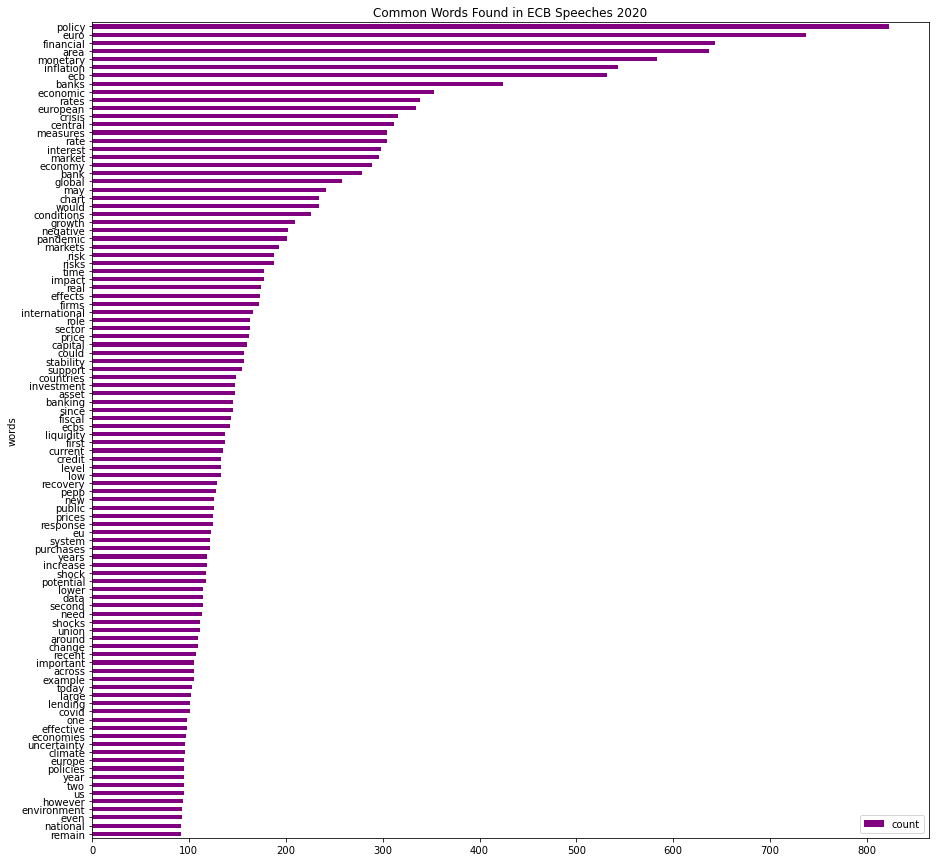

In [371]:

fig, ax = plt.subplots(figsize=(15, 15))

# Plot horizontal bar graph
clean_df_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in ECB Speeches "+str(year))

plt.show()


In [372]:
text = clean_df_ncw.iloc[:, 0]
text

0          policy
1            euro
2       financial
3            area
4        monetary
         ...     
95        however
96           even
97    environment
98       national
99         remain
Name: words, Length: 100, dtype: object

<Figure size 432x288 with 0 Axes>

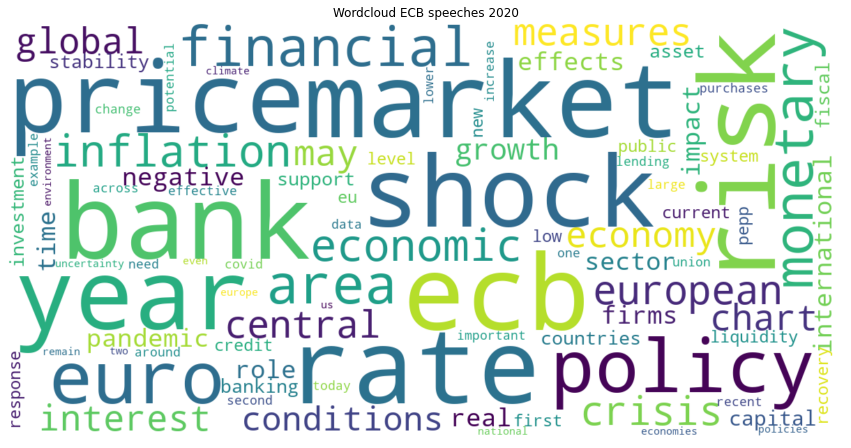

In [373]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud( max_font_size=50, max_words=100,scale=3,
                      background_color="white").generate(' '.join(clean_df_ncw['words']))
plt.figure()
plt.figure(figsize=(15,10))
title="Wordcloud ECB speeches "+str(year)
plt.title(title)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file(title+".png")